In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',150)
#Modelacion no supervisada sirve para encontrar topicos
#lda sirve como modelo mas fino para este tipo, en ligar de cluster es generacion de topicos


In [ ]:
data=pd.read_csv('../data/tmdb_5000_movies.csv')
#Nos enfocaremos en los overview

In [ ]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
data['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
data['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [ ]:
data['genres'][10]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
data['genres'].sample().values[0]


'[{"id": 18, "name": "Drama"}, {"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'

In [ ]:
data['genres']=data['genres'].map(eval)

In [ ]:
data['genres'].str[0].str['name']

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801            NaN
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [ ]:
data['main_gender']=data['genres'].str[0].str['name']

In [ ]:
data['main_gender'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: main_gender, dtype: int64

In [ ]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,main_gender
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action


In [ ]:
gender='Drama' #Nos enfocamos en drama como genero principal

In [ ]:
data_gender= data[data['main_gender']==gender].copy() #generamos un data frame auxiliar

In [ ]:
data_gender.reset_index(drop=True,inplace=True)

In [ ]:
data_gender

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,main_gender
0,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Drama
1,105000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,64682,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,61.196071,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-05-10,351040419,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Reserving judgments is a matter of infinite ho...,The Great Gatsby,7.3,3769,Drama
2,185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,Drama
3,175000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://movies.disney.com/inside-out,150540,"[{""id"": 1566, ""name"": ""dream""}, {""id"": 6513, ""...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,857611174,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Meet the little voices inside your head.,Inside Out,8.0,6560,Drama
4,175000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,64686,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-12-06,150962475,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.9,1326,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,0,"[{'id': 18, 'name': 'Drama'}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0,Drama
1203,0,"[{'id': 18, 'name': 'Drama'}]",NaN,39851,"[{""id"": 6782, ""name"": ""addiction""}, {""id"": 155...",en,Clean,"After losing her husband to a heroin overdose,...",1.464566,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2004-09-01,0,111.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,"When you don't have a choice, you change.",Clean,6.7,17,Drama
1204,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17,Drama
1205,0,"[{'id': 18, 'name': 'Drama'}]",NaN,182291,"[{""id"": 718, ""name"": ""con

In [ ]:
var_cluster=['overview'] #Solo nos vamos a basar en overview

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.corpus import stopwords

In [ ]:
df=data_gender[['original_title','popularity']+var_cluster].copy() #auxiliar para perfilar el cluster

In [ ]:
df.head()

,original_title,popularity,overview
0,Titanic,100.025899,"84 years later, a 101-year-old woman named Ros..."
1,The Great Gatsby,61.196071,An adaptation of F. Scott Fitzgerald's Long Is...
2,The Dark Knight,187.322927,Batman raises the stakes in his war on crime. ...
3,Inside Out,128.655964,"Growing up can be a bumpy road, and it's no ex..."
4,47 Ronin,41.796339,"Based on the original 1941 movie from Japan, a..."


In [ ]:
df.dropna(inplace=True) #Quitamos el nulo

In [ ]:
df.isnull().sum()

original_title    0
popularity        0
overview          0
dtype: int64

In [ ]:
import re, unicodedata
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res
    

In [ ]:
df['text_clean']=df['overview'].map(clean_words)

In [ ]:
import spacy #Lematizacion con spacy, procesamiento de lenguaje natural
nlp = spacy.load('en_core_web_sm') #Activa lo inerente al idioma

In [ ]:
#Es correcto usarla pero es peligrosa en su uso
def lemmatization(text):
    words = nlp(text.upper())
    text_lemma =" ".join([token.lemma_ for token in words ])
    return text_lemma.lower()

In [ ]:
df['text_clean']=df['text_clean'].map(lemmatization)

In [ ]:
stopwords=stopwords.words('english') #relativas al idioma

In [ ]:
#Vectorizamos
cv = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 1), min_df=10, max_features=100)

In [ ]:
cv.fit(df["text_clean"])

TfidfVectorizer(max_features=100, min_df=10,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
X_train = pd.DataFrame(data = cv.transform(df["text_clean"]).todense(), columns= cv.get_feature_names(),index=df.index) 

In [ ]:
X_train

,also,american,around,back,based,become,becomes,begin,best,boy,british,brother,career,change,child,city,come,daughter,day,death,decide,discover,drama,end,face,family,father,fight,film,find,first,follow,former,friend,get,girl,go,group,help,high,home,husband,know,leave,life,live,long,lose,love,make,man,meet,mother,move,murder,must,name,new,old,one,people,play,relationship,return,school,see,set,sister,small,son,soon,star,story,struggle,student,take,takes,team,tell,thing,three,time,together,town,true,try,turn,two,want,war,way,whose,wife,woman,women,work,world,year,york,young
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.303256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.265219,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.278503,0.0,0.0,0.232311,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.161866,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.246805,0.0,0.0,0.0,0.29049,0.000000,0.234203,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.244537,0.0,0.0,0.000000,0.000000,0.0,0.387691,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.249952,0.000000,0.0,0.000000,0.41335,0.0,0.190727
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.489696,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.487052,0.401591,0.0,0.0,0.000000,0.487052,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.352822,0.00000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.314583,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.406753,0.0,0.0,0.000000,0.455126,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.388795,0.0,0.0,0.000000,0.471533,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.393631,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.261373,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.215451,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.234704,0.0,0.0,0.000000,0.000000,0.0,0.445493,0.226423,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.567647,0.000000,0.0,0.0,0.0,0.0,0.0,0.233115,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.260154,0.0,0.0,0.000000,0.0,0.0,0.279842,0.0,0.0,0.000000,0.0,0.000000,0.240606,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.697860,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.716234,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering

In [ ]:
X_train.describe()

,also,american,around,back,based,become,becomes,begin,best,boy,british,brother,career,change,child,city,come,daughter,day,death,decide,discover,drama,end,face,family,father,fight,film,find,first,follow,former,friend,get,girl,go,group,help,high,home,husband,know,leave,life,live,long,lose,love,make,man,meet,mother,move,murder,must,name,new,old,one,people,play,relationship,return,school,see,set,sister,small,son,soon,star,story,struggle,student,take,takes,team,tell,thing,three,time,together,town,true,try,turn,two,want,war,way,whose,wife,woman,women,work,world,year,york,young
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,0.012738,0.022687,0.013368,0.016660,0.020478,0.025969,0.024539,0.021595,0.012427,0.019914,0.013107,0.018262,0.014074,0.017738,0.018240,0.017800,0.026614,0.021204,0.022214,0.022149,0.015538,0.021276,0.018074,0.017985,0.017090,0.044200,0.031680,0.013057,0.029807,0.045490,0.020412,0.017630,0.016153,0.030072,0.030177,0.019158,0.029026,0.015843,0.022959,0.017000,0.020032,0.018510,0.015261,0.021076,0.077738,0.024420,0.013750,0.017464,0.038765,0.025021,0.047784,0.014602,0.026733,0.015701,0.015865,0.019012,0.014346,0.043541,0.029358,0.039244,0.018580,0.013562,0.022586,0.017083,0.024219,0.015027,0.028987,0.016248,0.014886,0.030203,0.013113,0.016512,0.054039,0.016976,0.014777,0.024973,0.016445,0.016181,0.014724,0.011866,0.017265,0.021893,0.017139,0.018913,0.023968,0.022164,0.023448,0.035512,0.018753,0.030354,0.020682,0.014942,0.026327,0.027375,0.014938,0.018925,0.040877,0.040243,0.016095,0.049213
std,0.074636,0.099604,0.076872,0.080481,0.094727,0.099439,0.108179,0.091615,0.073098,0.093897,0.082620,0.089743,0.078765,0.092411,0.092101,0.090715,0.100365,0.096605,0.096624,0.096834,0.075420,0.093161,0.095069,0.084491,0.090866,0.126883,0.109028,0.075924,0.112584,0.117079,0.100983,0.088471,0.092432,0.101187,0.110438,0.088700,0.110295,0.090797,0.093464,0.086404,0.087551,0.092063,0.080373,0.091468,0.151404,0.094599,0.075900,0.087903,0.118132,0.093047,0.128156,0.078020,0.102173,0.081050,0.086933,0.088788,0.076131,0.120300,0.101725,0.116321,0.089205,0.083623,0.102494,0.084481,0.097586,0.082879,0.110551,0.084983,0.079840,0.116500,0.071258,0.087981,0.137534,0.084354,0.089318,0.097716,0.085413,0.097252,0.081390,0.070024,0.085875,0.097017,0.083998,0.087421,0.102207,0.095538,0.095721,0.111504,0.086638,0.115337,0.091485,0.086366,0.103863,0.106676,0.089739,0.087257,0.121763,0.110435,0.082298,0.121479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
Xs=sc.fit_transform(X_train)

In [ ]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_inertia.append(cl.inertia_)

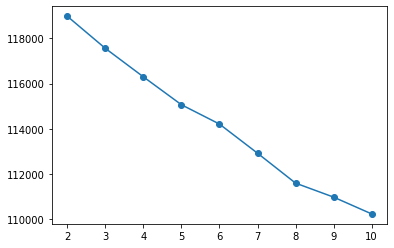

In [ ]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k, random_state=1000)
    cl_sil.fit(Xs)
    lst_silhouette.append(silhouette_score(Xs,cl_sil.predict(Xs)))

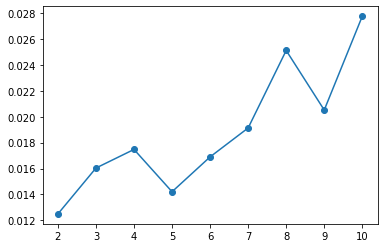

In [ ]:
plt.plot(range(2,11),lst_silhouette,marker='o')

In [ ]:
from sklearn.mixture import GaussianMixture

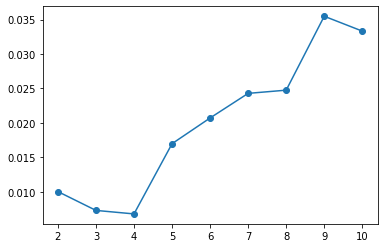

In [ ]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(X_train,
                                              GaussianMixture(n_components=k,max_iter=1000,random_state=10).fit_predict(X_train))),
                 range(2,11)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [ ]:
km=KMeans(n_clusters=5, random_state=1000)

In [ ]:
gmm= GaussianMixture(n_components=5,random_state=10)

In [ ]:
X_train

,also,american,around,back,based,become,becomes,begin,best,boy,british,brother,career,change,child,city,come,daughter,day,death,decide,discover,drama,end,face,family,father,fight,film,find,first,follow,former,friend,get,girl,go,group,help,high,home,husband,know,leave,life,live,long,lose,love,make,man,meet,mother,move,murder,must,name,new,old,one,people,play,relationship,return,school,see,set,sister,small,son,soon,star,story,struggle,student,take,takes,team,tell,thing,three,time,together,town,true,try,turn,two,want,war,way,whose,wife,woman,women,work,world,year,york,young
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.303256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.265219,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.278503,0.0,0.0,0.232311,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.161866,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.246805,0.0,0.0,0.0,0.29049,0.000000,0.234203,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.244537,0.0,0.0,0.000000,0.000000,0.0,0.387691,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.249952,0.000000,0.0,0.000000,0.41335,0.0,0.190727
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.489696,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.487052,0.401591,0.0,0.0,0.000000,0.487052,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.352822,0.00000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.314583,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.406753,0.0,0.0,0.000000,0.455126,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.388795,0.0,0.0,0.000000,0.471533,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.393631,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.261373,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.215451,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.234704,0.0,0.0,0.000000,0.000000,0.0,0.445493,0.226423,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.567647,0.000000,0.0,0.0,0.0,0.0,0.0,0.233115,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.260154,0.0,0.0,0.000000,0.0,0.0,0.279842,0.0,0.0,0.000000,0.0,0.000000,0.240606,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.697860,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.716234,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
 km.fit_predict(Xs)

array([0, 4, 4, ..., 4, 3, 3], dtype=int32)

In [ ]:
gmm.fit_predict(Xs)

array([3, 2, 2, ..., 1, 2, 3])

In [ ]:
df['cl_km']= X_train['cl_km']= km.fit_predict(Xs)

In [ ]:
df['cl_gmm']= X_train['cl_gmm']= gmm.fit_predict(Xs)

In [ ]:
X_train['cl_gmm'].value_counts(1)

3    0.321725
4    0.224710
2    0.200663
1    0.181592
0    0.071310
Name: cl_gmm, dtype: float64

In [ ]:
X_train['cl_km'].value_counts(1)

4    0.409619
2    0.198176
3    0.165837
0    0.155058
1    0.071310
Name: cl_km, dtype: float64

In [ ]:
from PIL.Image import open as open_wordcloud
import stylecloud

In [ ]:
def get_wordcloud(data,feat,txt_name="wordcloud.txt",output_name="wordcloud.png", 
                  icon_name="fas fa-circle", colors=["#003865",
"#EF5B0C","#3CCF4E"],
                  background_color='white',collocations=False,size=512):
    corpus_origen=" ".join(data[feat].map(lambda text: str(text)).to_list())
    with open(txt_name,"w") as f:
        f.write(corpus_origen)
    stylecloud.gen_stylecloud(collocations=collocations,file_path = txt_name, 
                              icon_name= icon_name,output_name=output_name,colors=colors,
                              background_color=background_color,size=size)
    return open_wordcloud(output_name)

In [ ]:
df

,original_title,popularity,overview,text_clean,cl_km,cl_gmm
0,Titanic,100.025899,"84 years later, a 101-year-old woman named Ros...",84 year later a 101 year old woman name rose d...,0,3
1,The Great Gatsby,61.196071,An adaptation of F. Scott Fitzgerald's Long Is...,an adaptation of f scott fitzgerald s long isl...,4,2
2,The Dark Knight,187.322927,Batman raises the stakes in his war on crime. ...,batman raise the stakes in his war on crime wi...,4,2
3,Inside Out,128.655964,"Growing up can be a bumpy road, and it's no ex...",grow up can be a bumpy road and it s no except...,1,1
4,47 Ronin,41.796339,"Based on the original 1941 movie from Japan, a...",based on the original 1941 movie from japan an...,2,2
...,...,...,...,...,...,...
1202,Stories of Our Lives,0.327794,Created by the members of a Nairobi-based arts...,create by the member of a nairobi based arts c...,2,2
1203,Clean,1.464566,"After losing her husband to a heroin overdose,...",after lose she husband to a heroin overdose em...,4,3
1204,دایره,1.193779,Various women struggle to function in the oppr...,various women struggle to function in the oppr...,4,1
1205,On The Downlow,0.029757,Isaac and Angel are two young Latinos involved...,isaac and angel be two young latinos involve i...,3,2


In [ ]:
data_aux=df[df['cl_km']==1][['text_clean']].copy()

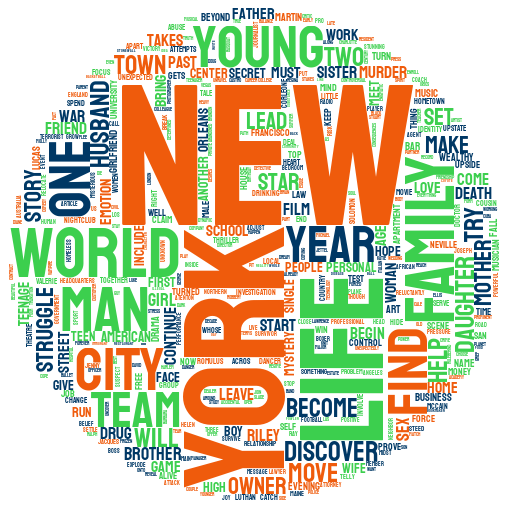

In [ ]:
get_wordcloud(data_aux,'text_clean')

In [ ]:
df[df['cl_km']==1][['original_title','popularity']].sort_values(by='popularity',ascending=False).head()

,original_title,popularity
3,Inside Out,128.655964
575,The Godfather: Part II,105.792936
398,12 Years a Slave,95.922900
5,I Am Legend,70.867401
660,Insidious: Chapter 3,45.946524


In [ ]:
df['cl_km'].unique()

array([0, 4, 1, 2, 3], dtype=int32)

0


,original_title,popularity
0,Titanic,100.025899
579,Ex Machina,95.130041
413,Psycho,93.067866
581,Room,66.113340
952,올드보이,56.763490


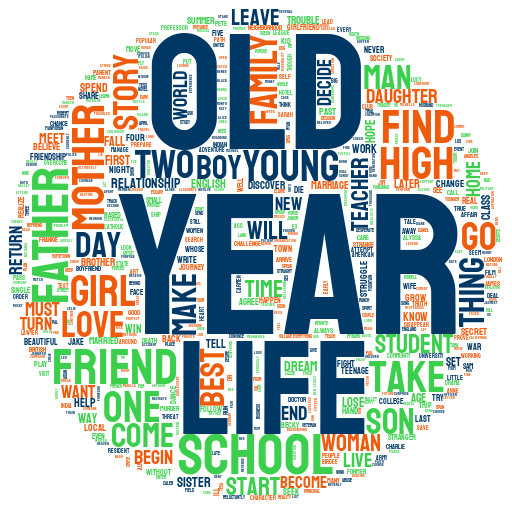

4


,original_title,popularity
2,The Dark Knight,187.322927
17,The Martian,167.932870
69,Fight Club,146.757391
761,The Godfather,143.659698
335,The Shawshank Redemption,136.747729


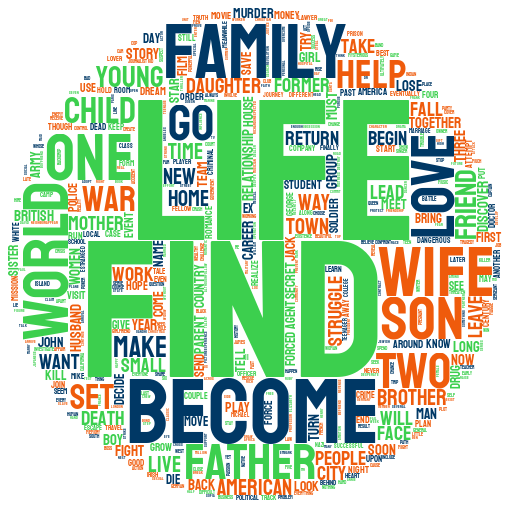

1


,original_title,popularity
3,Inside Out,128.655964
575,The Godfather: Part II,105.792936
398,12 Years a Slave,95.922900
5,I Am Legend,70.867401
660,Insidious: Chapter 3,45.946524


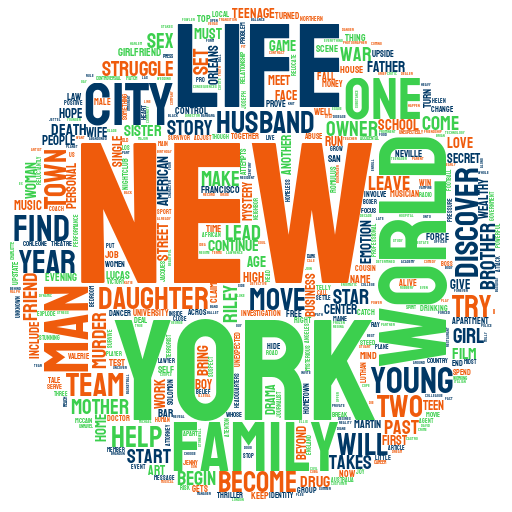

2


,original_title,popularity
321,Schindler's List,104.469351
169,Fifty Shades of Grey,98.755657
176,The Prestige,74.440708
114,Catch Me If You Can,73.944049
22,Cloud Atlas,73.872343


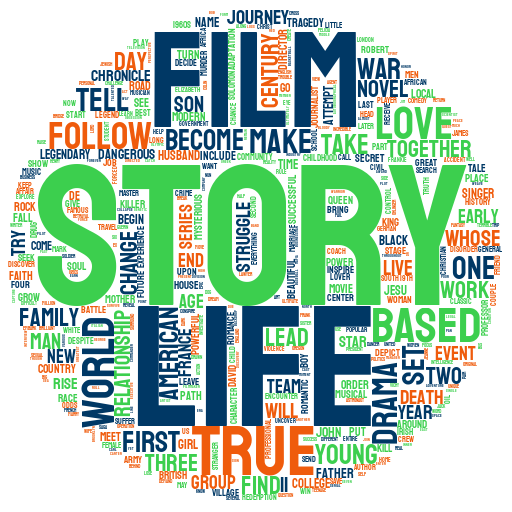

3


,original_title,popularity
928,Whiplash,192.528841
96,The Pursuit of Happyness,80.581367
604,Paper Towns,64.610671
110,Moulin Rouge!,57.374341
331,The Giver,53.811461


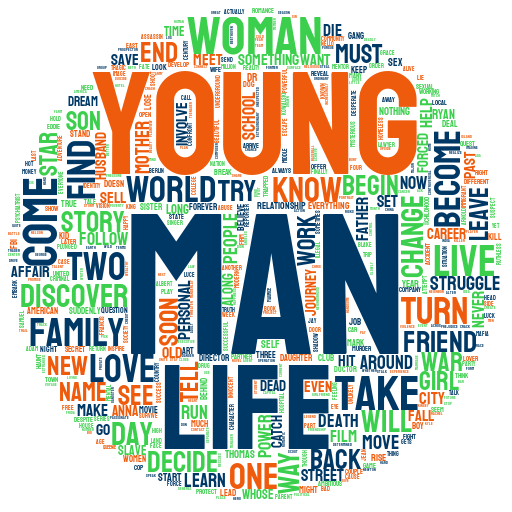

In [ ]:
for cl in df['cl_km'].unique():
    data_aux=df[df['cl_km']==cl][['text_clean']].copy()
    print(cl)
    display(df[df['cl_km']==cl][['original_title','popularity']].sort_values(by='popularity',ascending=False).head())
    display(get_wordcloud(data_aux,'text_clean'))

3


,original_title,popularity
928,Whiplash,192.528841
761,The Godfather,143.659698
335,The Shawshank Redemption,136.747729
884,One Flew Over the Cuckoo's Nest,127.525581
0,Titanic,100.025899


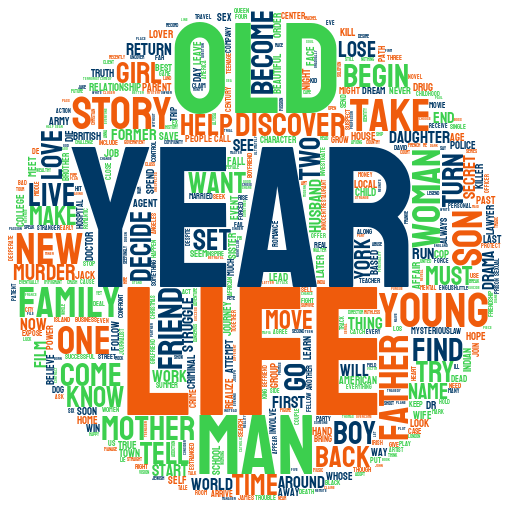

2


,original_title,popularity
2,The Dark Knight,187.322927
575,The Godfather: Part II,105.792936
321,Schindler's List,104.469351
398,12 Years a Slave,95.922900
579,Ex Machina,95.130041


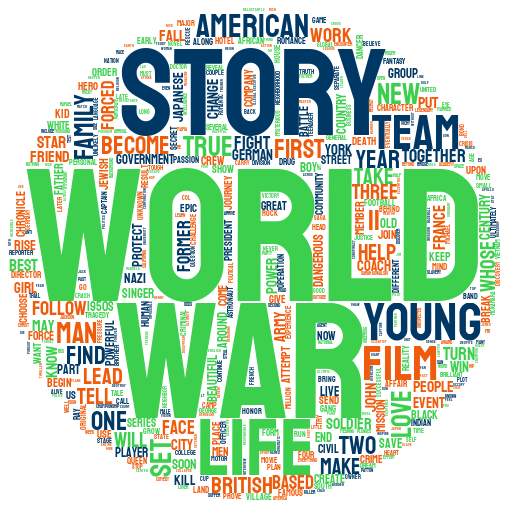

1


,original_title,popularity
3,Inside Out,128.655964
169,Fifty Shades of Grey,98.755657
176,The Prestige,74.440708
5,I Am Legend,70.867401
800,The Usual Suspects,64.025031


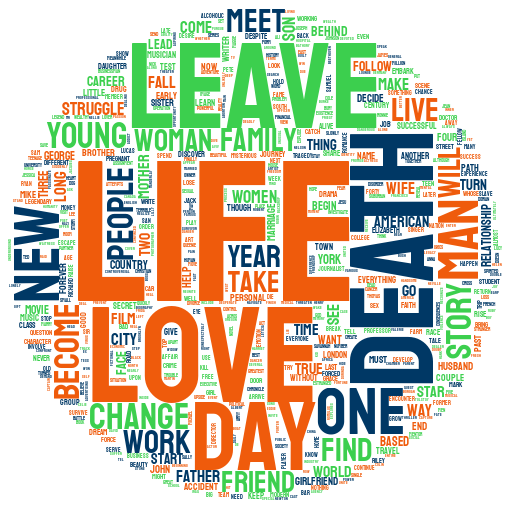

4


,original_title,popularity
17,The Martian,167.932870
69,Fight Club,146.757391
574,Black Swan,91.285683
454,Birdman,89.811154
19,Django Unchained,82.121691


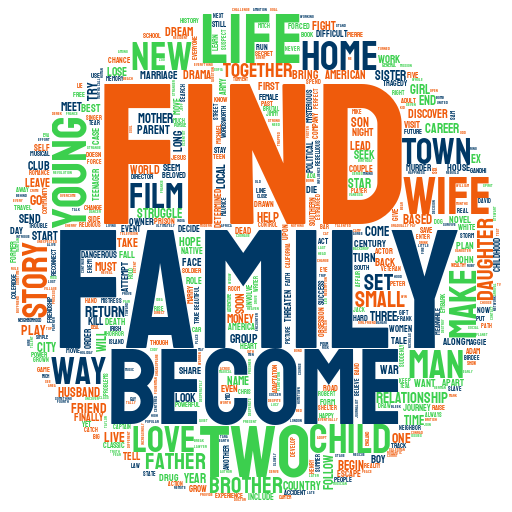

0


,original_title,popularity
513,The Theory of Everything,61.182331
45,A Beautiful Mind,59.248437
488,Dead Poets Society,55.458584
218,21,45.149948
245,A Few Good Men,40.379966


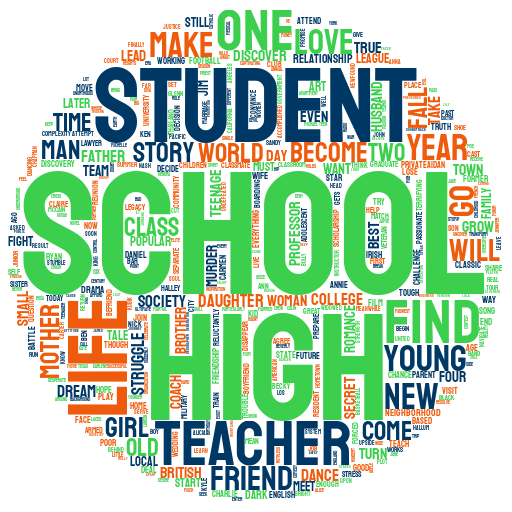

In [ ]:
for cl in df['cl_gmm'].unique():
    data_aux=df[df['cl_gmm']==cl][['text_clean']].copy()
    print(cl)
    display(df[df['cl_gmm']==cl][['original_title','popularity']].sort_values(by='popularity',ascending=False).head())
    display(get_wordcloud(data_aux,'text_clean'))

pd.to_pickle(gmm,'gmm_topics_movies.pkl')

pd.to_pickle(df,'data_calficada_cluster_movies.pkl')